# Teste de Visualizações

Notebook para testar e visualizar todos os gráficos do módulo `visualization.py`

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from utils.visualization import (
    plot_confusion_matrix,
    plot_metrics_comparison,
    plot_class_distribution,
    plot_inference_time_comparison,
)

# Configurar matplotlib para mostrar gráficos inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Matriz de Confusão

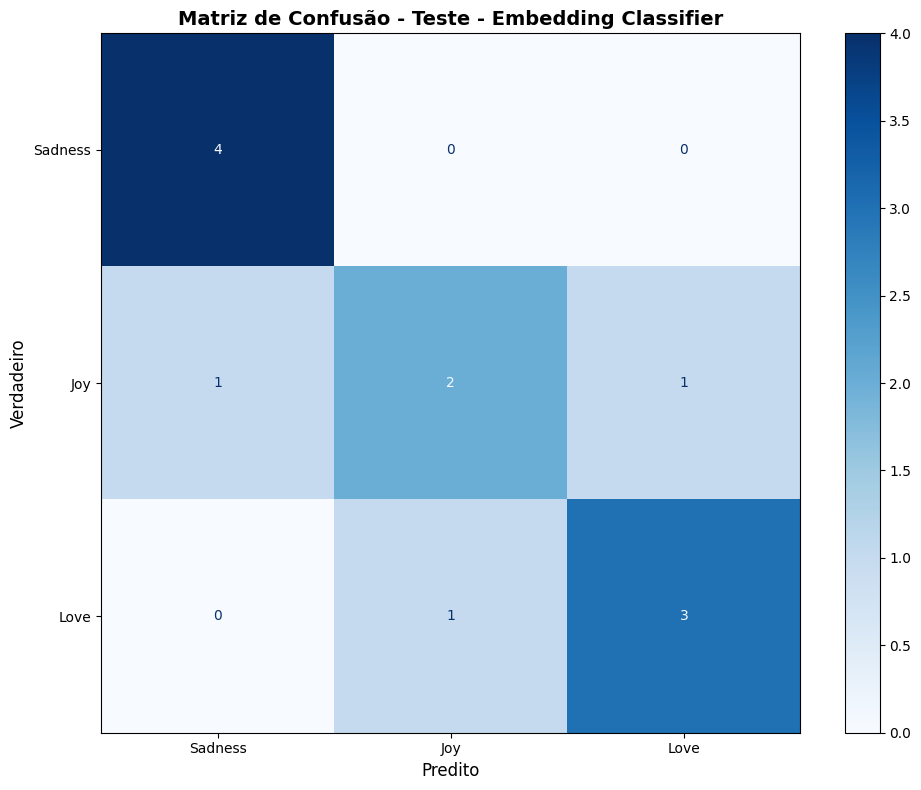

In [7]:
# Dados de exemplo
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])
y_pred = np.array([0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2])
labels = ['Sadness', 'Joy', 'Love']

fig = plot_confusion_matrix(y_true, y_pred, labels, "Teste - Embedding Classifier")
plt.show()

## 2. Matriz de Confusão Normalizada

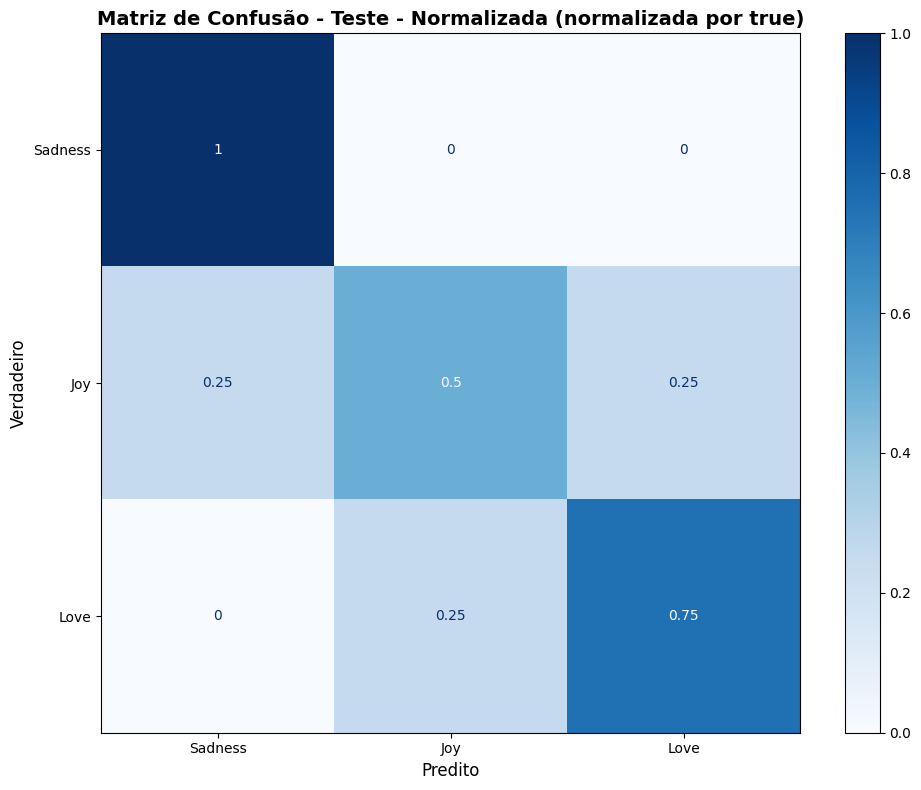

In [3]:
fig = plot_confusion_matrix(
    y_true, y_pred, labels, 
    "Teste - Normalizada",
    normalize='true'
)
plt.show()

## 3. Comparação de Métricas entre Classificadores

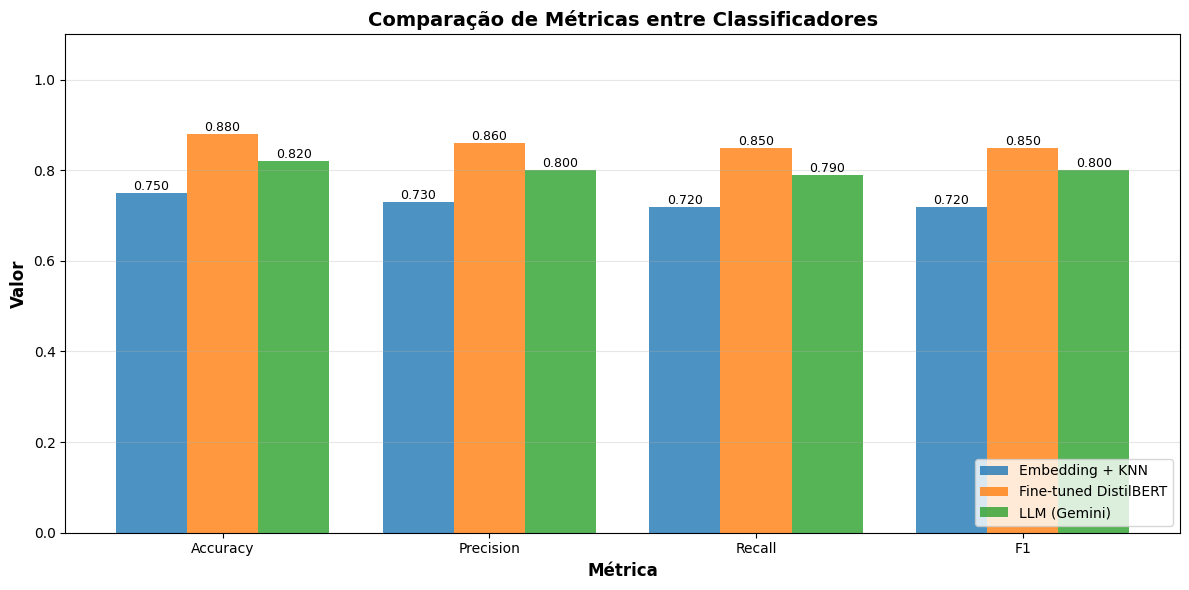

In [4]:
# Simulação de resultados
comparison = {
    'accuracy': {
        'Embedding + KNN': 0.75,
        'Fine-tuned DistilBERT': 0.88,
        'LLM (Gemini)': 0.82
    },
    'precision': {
        'Embedding + KNN': 0.73,
        'Fine-tuned DistilBERT': 0.86,
        'LLM (Gemini)': 0.80
    },
    'recall': {
        'Embedding + KNN': 0.72,
        'Fine-tuned DistilBERT': 0.85,
        'LLM (Gemini)': 0.79
    },
    'f1': {
        'Embedding + KNN': 0.72,
        'Fine-tuned DistilBERT': 0.85,
        'LLM (Gemini)': 0.80
    }
}

fig = plot_metrics_comparison(comparison)
plt.show()

## 4. Distribuição de Classes

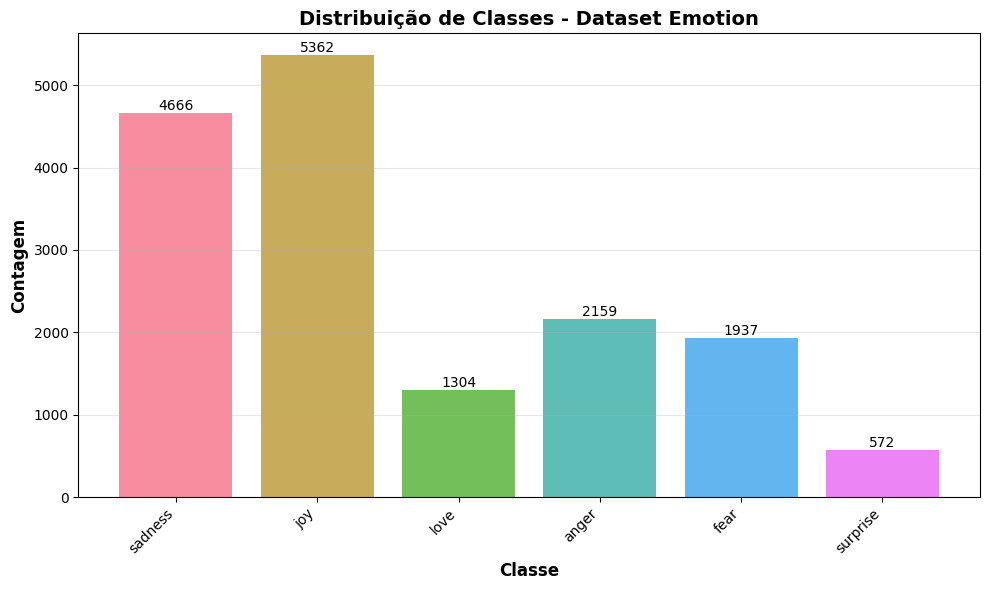

In [5]:
labels_count = {
    'sadness': 4666,
    'joy': 5362,
    'love': 1304,
    'anger': 2159,
    'fear': 1937,
    'surprise': 572
}

fig = plot_class_distribution(labels_count, "Distribuição de Classes - Dataset Emotion")
plt.show()

## 5. Comparação de Tempo de Inferência

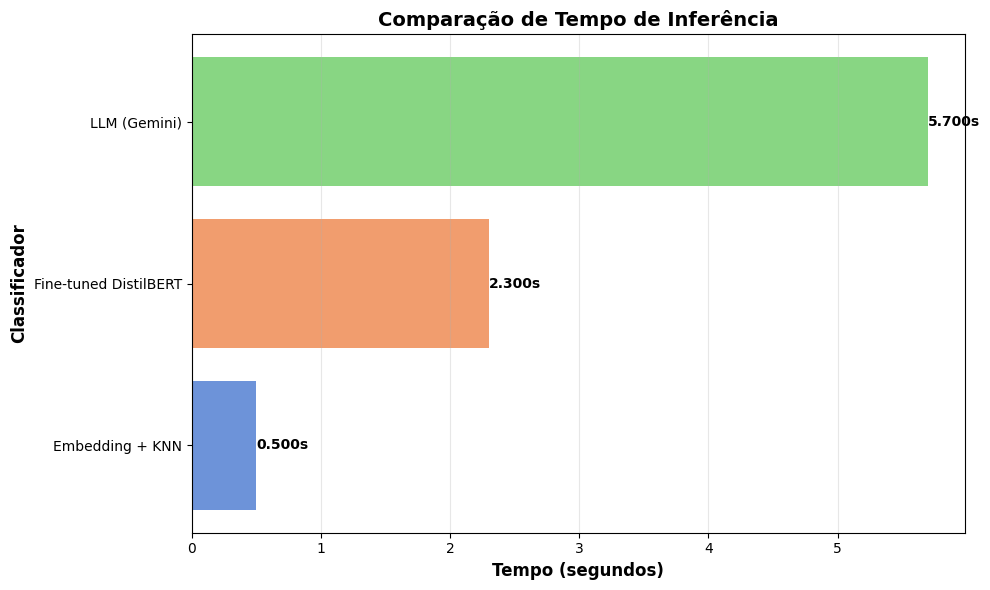

In [6]:
times_dict = {
    'Embedding + KNN': 0.5,
    'Fine-tuned DistilBERT': 2.3,
    'LLM (Gemini)': 5.7
}

fig = plot_inference_time_comparison(times_dict)
plt.show()

## 6. Análise: Trade-offs

Baseado nos gráficos acima, podemos observar:

### Precisão vs Velocidade

- **Embedding + KNN**: Mais rápido (0.5s), precisão moderada (~75%)
- **Fine-tuned DistilBERT**: Melhor precisão (~88%), velocidade média (2.3s)
- **LLM (Gemini)**: Boa precisão (~82%), mais lento (5.7s)

### Quando usar cada abordagem?

1. **Embedding + KNN**: 
   - ✅ Prototipagem rápida
   - ✅ Alto volume de predições
   - ✅ Sem GPU disponível

2. **Fine-tuned DistilBERT**:
   - ✅ Melhor precisão necessária
   - ✅ Tarefa específica bem definida
   - ✅ GPU disponível para treinamento

3. **LLM (Gemini)**:
   - ✅ Flexibilidade (várias tarefas)
   - ✅ Poucos dados de treino
   - ✅ Interpretabilidade via prompt